In [80]:
import pandas as pd
import glob

file_list = glob.glob('./raw/*.xlsx')
df_list = []

for file in file_list:
    df = pd.read_excel(file)
    df_list.append(df)

# 모든 데이터프레임 합치기
klue_df = pd.concat(df_list, ignore_index=True)

# CSV 파일로 저장
rating_columns = ["Average Score", "Attd_rate", "avg_study", "avg_diff", "avg_performance", "avg_satisfaction", "recc_rate"]
klue_df = klue_df.dropna(subset=rating_columns, how='all')
klue_df.drop(columns=["Idx"], inplace=True)
klue_df.to_csv('klue_merged.csv', index=False, encoding='utf-8')

In [81]:
klue_df.describe()

,Year,Average Score,avg_study,avg_diff,avg_performance,avg_satisfaction
count,31247.000000,31247.000000,31247.000000,31247.000000,31247.000000,31247.000000
mean,2020.043588,3.953160,3.304112,3.123663,3.742071,3.487794
std,2.004433,0.593095,0.764983,0.680581,0.980554,0.639443
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2018.000000,3.600000,2.800000,2.700000,3.200000,3.100000
50%,2020.000000,4.000000,3.400000,3.100000,4.000000,3.600000
75%,2022.000000,4.400000,3.900000,3.600000,4.500000,4.000000
max,2023.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [96]:
group_by_year = klue_df.groupby(by="Year")
count_by_year = klue_df.groupby(by="Year").size().reset_index(name='count')

In [97]:
group_by_year.describe()

Average Score                                              avg_study  \
             count      mean       std  min  25%  50%  75%  max     count   
Year                                                                        
2017        4487.0  3.736260  0.618519  1.1  3.4  3.8  4.2  5.0    4487.0   
2018        4302.0  3.723594  0.584898  1.3  3.4  3.8  4.1  5.0    4302.0   
2019        4109.0  3.784059  0.586746  1.4  3.4  3.8  4.2  5.0    4109.0   
2020        4486.0  3.984084  0.577200  1.3  3.6  4.1  4.4  5.0    4486.0   
2021        4698.0  4.095636  0.511694  1.5  3.8  4.2  4.5  5.0    4698.0   
2022        4657.0  4.150633  0.537587  1.0  3.8  4.2  4.6  5.0    4657.0   
2023        4508.0  4.159006  0.535429  1.4  3.8  4.2  4.6  5.0    4508.0   

                ... avg_performance      avg_satisfaction                      \
          mean  ...             75%  max            count      mean       std   
Year            ...                                                             
2017  3.295387  ...             4.8  5.0           4487.0  3.421529  0.685533   
2018  3.181567  ...             4.8  5.0           4302.0  3.433612  0.661774   
2019  3.210343  ...             4.7  5.0           4109.0  3.449160  0.654460   
2020  3.339568  ...             4.3  5.0           4486.0  3.502430  0.640283   
2021  3.396892  ...             4.3  5.0           4698.0  3.503001  0.607193   
2022  3.350311  ...             4.3  5.0           4657.0  3.538673  0.604864   
2023  3.335515  ...             4.4  5.0           4508.0  3.557697  0.609867   

                               
      min  25%  50%  75%  max  
Year                           
2017  1.0  3.0  3.5  3.9  5.0  
2018  1.2  3.0  3.5  3.9  5.0  
2019  1.0  3.0  3.5  3.9  5.0  
2020  1.1  3.1  3.6  4.0  5.0  
2021  1.0  3.1  3.6  3.9  5.0  
2022  1.2  3.1  3.6  4.0  5.0  
2023  1.0  3.2  3.6  4.0  5.0  

[7 rows x 40 columns]

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False



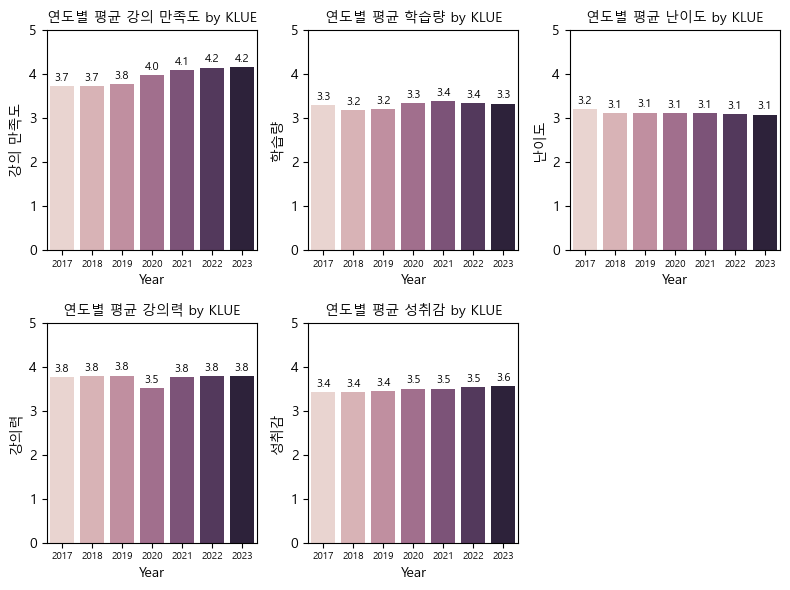

In [98]:
target_mean_column = ["Average Score", "avg_study", "avg_diff", "avg_performance", "avg_satisfaction"]
column2kor = {"Average Score": "강의 만족도",
              "avg_study": "학습량",
              "avg_diff": "난이도",
              "avg_performance": "강의력",
              "avg_satisfaction": "성취감"}

num_cols = 3  # 한 행에 몇 개 그래프?
num_rows = (len(target_mean_column) + num_cols - 1) // num_cols  # 필요한 행 개수

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3 * num_rows))
axes = axes.flatten()  # 2차원 배열을 1차원으로

for i, column in enumerate(target_mean_column):
    average_score_mean = group_by_year[column].mean().reset_index()
    sns.barplot(data=average_score_mean, x='Year', y=column, ax=axes[i], hue="Year")
    axes[i].set_title(f'연도별 평균 {column2kor[column]} by KLUE', fontsize=10)
    axes[i].set_ylabel(column2kor[column])
    axes[i].set_xlabel('Year')
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].legend().set_visible(False)
    axes[i].set_ylim(0.0, 5.0)

    for p in axes[i].patches:
        height = p.get_height()
        if height == 0: continue
        axes[i].text(
            p.get_x() + p.get_width() / 2,  # x 좌표: 바 중앙
            height + 0.05,                        # y 좌표: 바 높이
            f'{height:.1f}',               # 표시할 텍스트 (소수점 1자리)
            ha='center',                   # 가운데 정렬
            va='bottom',                   # 텍스트가 바 위쪽에 붙도록
            fontsize=8                     # 폰트 크기 작게
        )

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [92]:
count_by_year

,Year,count
0,2017,4487
1,2018,4302
2,2019,4109
3,2020,4486
4,2021,4698
5,2022,4657
6,2023,4508
